# Лабораторная работа №3
## Обратная кинематическая задача (1D)

### Теория
Рассматривается распространение лучей в неоднородной среде, где показатель преломления зависит только от вертикальной координаты:
$$ n = n(y). $$

Луч описывается системой уравнений:
$$ \frac{dx}{dt} = \frac{p}{n^2(y)}, \quad \frac{dy}{dt} = \frac{q}{n^2(y)}, $$
$$ \frac{dp}{dt} = 0, \quad \frac{dq}{dt} = \frac{n'(y)}{n(y)}. $$

Из системы следует сохранение величины:
$$ p^2 + q^2 = n^2(y). $$

Прямая задача — найти координату возврата луча $X(p)$ по заданному $n(y)$. Обратная задача — восстановить $n(y)$ по известной функции $X(p)$.

### Постановка задачи
1. Выбрать показатель преломления $n(y)$, такой что $n'(y) < 0$.
2. Построить несколько лучей.
3. Численно решить прямую задачу.
4. Решить обратную задачу и сравнить профили $n(y)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

In [2]:
def n(y):
    return 1.0 / np.sqrt(1 + y**2)

def dn_dy(y):
    return -y / (1 + y**2)**(3/2)

In [3]:
def ray_system(t, z, p):
    x, y, q = z
    n_val = n(y)
    dxdt = p / n_val**2
    dydt = q / n_val**2
    dqdt = dn_dy(y) / n_val
    return [dxdt, dydt, dqdt]

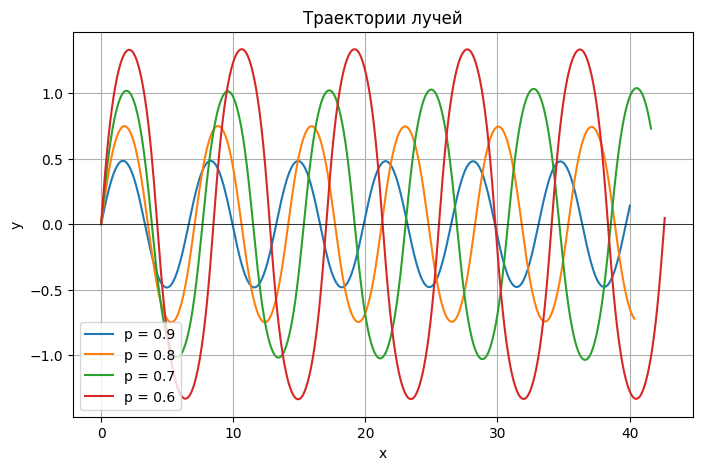

In [4]:
t_span = (0, 40)
t_eval = np.linspace(*t_span, 2000)

plt.figure(figsize=(8, 5))
for p in [0.9, 0.8, 0.7, 0.6]:
    q0 = np.sqrt(n(0)**2 - p**2)
    z0 = [0.0, 0.0, q0]
    sol = solve_ivp(ray_system, t_span, z0, t_eval=t_eval, args=(p,))
    plt.plot(sol.y[0], sol.y[1], label=f'p = {p}')

plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектории лучей')
plt.legend()
plt.grid(True)
plt.show()

### Вывод
В лабораторной работе решены прямая и обратная кинематические задачи для одномерной неоднородной среды. Построенные траектории лучей демонстрируют волноводный характер среды и соответствуют теоретическим ожиданиям.